## What is a neural network? 

Let's start with an easy example to get an idea of what a neural network is. Imagine a city has 10 ice cream vendors. We would like to predict what the sales amount is for an ice cream vendor given certain input features. Let's say you have several features to predict the sales for each ice cream vendor: the location, the way the ice cream is priced, and the variety in the ice cream offerings.

Let's look at the input feature *location*. You know that one of the things that really affects the sales is how many people will walk by the ice cream shop, as these are all potential customers. And realistically, the volume of people passing is largely driven by the *location*. 

Next, let's look at the input feature *pricing*. How the ice cream is priced really tells us something about the affordability, which will affect sales as well. 

Last, let's look at the *variety in offering*. When an ice cream shop offers a lot of different ice cream flavors, this might be perceived as a higher quality shop just because customers have more flavors to choose from (and might really like that!). On the other hand, *pricing* might also affect perceived quality: customers might feel that the quality is higher if the prices are higher. This shows that several inputs might affect one hidden feature, as these features in the so-called "hidden layer" are called. 

In reality, all features will be connected with all nodes in the hidden layer, and weights will be assigned to the edges (more about this later), as you can see in the network below. That's why networks like this are also referred to as **densely connected neural networks**. 

<img src="https://curriculum-content.s3.amazonaws.com/data-science/images/new_first_network.png" width=600> 



When we generalize this, a neural network looks like the configuration below. 

As you can see, to implement a neural network, we need to feed it the inputs $x_i$ (location, pricing, and variety in this example) and the outcome $y$ (sales in this example), and all the features in the middle will be figured out automatically in the network. That's why this layer is called the **hidden layer**, with the nodes representing **hidden units**.  

<img src="https://curriculum-content.s3.amazonaws.com/data-science/images/new_first_network_num.png" width=600> 

## The power of deep learning 

In our previous example, we have three input units, a hidden layer with 4 units, and 1 output unit. Notice that networks come in all shapes and sizes. This is only one example of what deep learning is capable of! The network described above can be extended almost endlessly:

- We can add more features (nodes) in the input layer 
- We can add more nodes in the hidden layer. Also, we can simply add more hidden layers. This is what turns a neural network into a "deep" neural network (hence, deep learning)
- We can also have several nodes in the output layer  

<img src="https://curriculum-content.s3.amazonaws.com/data-science/images/new_deeper_network.png" width=800> 

And there is one more thing that makes deep learning extremely powerful: unlike many other statistical and machine learning techniques, deep learning can deal extremely well with **unstructured data**.


In the ice cream vendor example, the input features can be seen as **structured data**. The input features very much take a form of a "classical" dataset: observations are rows, features are columns. Examples of **unstructured data**, however, are images, audio files, text data, etc. Historically, and unlike humans, machines had a very hard time interpreting unstructured data. Deep learning was really able to drastically improve machine performance when using unstructured data!

To illustrate the power of deep learning, we describe some applications of deep learning below: 

| x | y |
|---|---|
| features of an ice cream shop  | sales |
| Pictures of cats vs dogs | cat or dog? |
| Pictures of presidents | which president is it? |
| Dutch text | English text |
| audio files | text |
|  ... | ... |         

 
 
Types of neural networks: 

- Standard neural networks
- Convolutional neural networks (input = images, video)
- Recurrent neural networks (input = audio files, text, time series data)
- Generative adversarial networks

## An introductory example

### Problem statement and matrix representation

![title](https://curriculum-content.s3.amazonaws.com/data-science/images/santa.jpg)

You'll see that there is quite a bit of theory and mathematical notation needed when using neural networks. We'll introduce all this for the first time by using an example.
Imagine we have a dataset with images. Some of them have Santa in it, others don't. We'll use a neural network to train the model so it can detect whether Santa is in a picture or not.

As mentioned before, this is a kind of problem where the input data is composed of images. Now how does Python read images? To store an image, your computer stores three matrices which correspond with three color channels: red, green, and blue (also referred to as RGB). The numbers in each of the three matrices correspond with the pixel intensity values in each of the three colors. The picture below denotes a hypothetical representation of a 4 x 4 pixel image (note that 4 x 4 is tiny, generally you'll have much bigger dimensions). Pixel intensity values are on the scale [0, 255].

<img src="https://curriculum-content.s3.amazonaws.com/data-science/images/new_rgb.png" width=300>

Having three matrices associated with one image, we'll need to modify this shape to get to one input feature vector. You'll want to "unrow" your input feature values into one so-called "feature vector". You should start with unrowing the red pixel matrix, then the green one, then the blue one. Unrowing the RGB matrices in the image above would result in:

 $x = \begin{bmatrix} 35  \\ 19 \\  \vdots \\ 9 \\7 \\\vdots \\ 4 \\ 6 \\ \vdots \end{bmatrix}$

The resulting feature vector is a matrix with one column and 4 x 4 x 3 = 48 rows. Let's introduce some more notation to formalize this all.

$(x, y)$ = a training sample, where $x \in  \mathbb{R}^n , y \in \{0,1\}$. Note that $n$ is the number of inputs in the feature vector (48 in this example).

Let's say you have one training sample. Your training set then looks like this: $\{(x^{(1)},y^{(1)}), \ldots, (x^{(l)},y^{(l)})\}$ 

Similarly, let's say the test set has $m$ test samples.

Note that the resulting matrix $x$ has dimensions ($n$ x $l%$), and looks like this:

 $ \hspace{1.1cm} x^{(1)} \hspace{0.4cm} x^{(2)} \hspace{1.4cm} x^{(l)} $
 
 $x $= $\begin{bmatrix} 35 & 23 & \cdots & 1\\ 19 & 88 &\cdots & 230\\  \vdots & \vdots & \ddots & \vdots \\ 9 & 3 &\cdots & 222 \\7 &166 &\cdots  &43 \\ \vdots & \vdots & \ddots & \vdots  \\ 4 & 202 & \cdots & 98 \\ 6 & 54 & \cdots & 100 \\ \vdots & \vdots & \ddots & \vdots \end{bmatrix}$

The training set labels matrix has dimensions $(1$ x $ l)$, and would look something like this:

$y $= $\begin{bmatrix} 1 & 0 & \cdots & 1 \end{bmatrix}$

where 1 means that the image contains a Santa, 0 means there is no Santa in the image.


### Logistic regression as a neural network

So how will we be able to predict whether `y` is 0 or 1 for a certain image? You might remember from logistic regression models that the eventual predictor, $\hat y$, is generally never exactly 0 or 1, but some value in between. 

Formally, you'll denote that as $ \hat y = P(y=1 \mid x) $. 

Remember that $x \in  \mathbb{R}^n $. As in classical (logistic) regression we'll need some parameters. 

We'll need some expression here in order to make a prediction. The parameters here are $w \in  \mathbb{R}^n$ and $b \in \mathbb{R}$. Some expression to get to $\hat y$ could be $\hat y = w^T x + b$. The problem here is, however, that this type of expression does not ensure that the eventual outcome $ \hat y$ will be between zero and one, and it could be much bigger than one or even negative!

This is why a transformation of $w^T x + b$ is needed. For this particular example, we denote $\hat y = \sigma(w^T x + b)$, where $z = w^T x + b$, then $ \hat y = \sigma(z)$. This so-called *sigmoid function* is a popular *activation function* (more about activation functions later) in neural networks. With the expression for a sigmoid given by $\sigma(z) = \displaystyle\frac{1}{1 + \exp(-z)}$, it is clear that $\sigma(z)$ will always be somewhere between 0 and 1, as you can see in the plot below.

<img src="https://curriculum-content.s3.amazonaws.com/data-science/images/new_sigmoid_smaller.png" width=550>

Bringing all this together, the neural network can be represented as follows:

<img src="https://curriculum-content.s3.amazonaws.com/data-science/images/new_slogref.png" width=600>

### Define the loss and cost function

Problem statement: given that we have $\{(x^{(1)},y^{(1)}), \ldots, (x^{(l)},y^{(l)})\}$, we want to obtain $\hat y \approx y$. Neural networks use **loss** and **cost** functions here.

The **loss function** is used to measure the inconsistency between the predicted value $(\hat y)$ and the actual label $y$.

In logistic regression the loss function is defined as
$\mathcal{L}(\hat y, y) = - ( y \log (\hat y) + (1-y) \log(1-\hat y))$. The advantage of this loss function expression is that the optimization space here is convex, which makes optimizing using gradient descent easier. The loss function, however, is defined over one particular training sample. The cost function takes the average loss over all the samples: $J(w,b) = \displaystyle\frac{1}{l}\displaystyle\sum^l_{i=1}\mathcal{L}(\hat y^{(i)}, y^{(i)})$.
When you train your logistic regression model, the purpose is to find parameters $w$ and $b$ such that your cost function is minimized. 

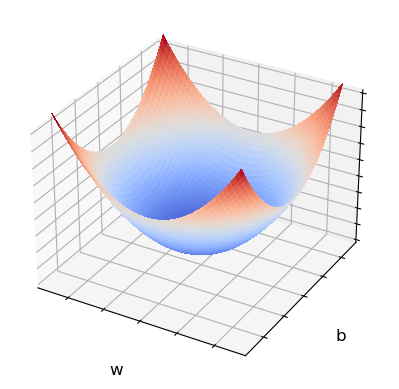

In [1]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax = fig.gca()

# Generate data
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
R = X**2+ Y**2 + 6

# Plot the surface
surf = ax.plot_surface(X, Y, R, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis
ax.set_zlim(0, 50)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlabel('w', fontsize=12)
ax.set_ylabel('b', fontsize=12)
ax.set_zlabel('J(w,b)', fontsize=12)

ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticklabels([])

plt.show()

Congratulations! You have gotten to the point where you have the expression for the cost function and the loss function. The step we have just taken is called **forward propagation**.

The cost function takes a convex form, looking much like this plot here! The idea is that you'll start with some initial values of $w$ and $b$, and then gradient descent, as you've seen before, takes a step in the steepest direction downhill.

Looking at $w$ and $b$ separately, the idea of the algorithm is that both $w$ and $b$ will be updated repeatedly in each step:

$w := w- \alpha\displaystyle \frac{dJ(w)}{dw}$ and
$b := b- \alpha\displaystyle \frac{dJ(b)}{db}$

Remember that $ \displaystyle \frac{dJ(w)}{dw}$ and $\displaystyle \frac{dJ(b)}{db}$ represent the *slope* of the function $J$ with respect to $w$ and $b$ respectively! We've never seen $\alpha$ before, but for now you should just remember that this is denoted the *learning rate*. 

What we have just explained here is called **backpropagation**. You need to take the derivatives to calculate the difference between the desired and calculated outcome, and repeat these steps until you get to the lowest possible cost value!

### Backpropagation for the logistic regression example

### The chain rule using one sample

When using the chain rule, computation graphs are popular. Imagine there are just two features $x_1$ and $x_2$. The graph going from our input variables to our loss function is given below: 

<img src="https://curriculum-content.s3.amazonaws.com/data-science/images/new_logreg.png" width=600>

You'll first want to compute the derivative to the loss with respect to $\hat y$.

1) You'll want to go from $\mathcal{L}(\hat y , y)$ to $\hat y = \sigma (z)$. You can do this by taking the derivative of $\mathcal{L}(\hat y , y)$ with respect to $\hat y$, and it can be shown that this is given by $\displaystyle \frac{d\mathcal{L}(\hat y , y)}{d \hat y} = \displaystyle \frac{-y}{\hat y}+\displaystyle \frac{1-y}{1-\hat y}$

2) As a next step you'll want to take the derivative with respect to $z$. It can be shown that $ dz = \displaystyle\frac{d\mathcal{L}(\hat y , y)}{d z} = \hat y - y$. This derivative can also be written as $\displaystyle\frac{d\mathcal{L}}{d\hat y} \displaystyle\frac{d\hat y}{dz} $.

3) Last, and this is where you want to get to, you need to derive $\mathcal{L}$ with respect to $w_1$, $w_2$ and $b$. It can be shown that: 
$dw_1 = \displaystyle\frac{d\mathcal{L}(\hat y , y)}{d w_1} = \displaystyle\frac{d\mathcal{L}(\hat y , y)}{d \hat y}\displaystyle\frac{d\hat y}{dz}\displaystyle\frac{dz}{d w_1} = x_1 dz $

Similarly, it can be shown that:
$dw_2 = \displaystyle\frac{d\mathcal{L}(\hat y , y)}{d w_2} = \displaystyle\frac{d\mathcal{L}(\hat y , y)}{d \hat y}\displaystyle\frac{d\hat y}{dz}\displaystyle\frac{dz}{d w_2} = x_2 dz $

and

$db = \displaystyle\frac{d\mathcal{L}(\hat y , y)}{d b} = \displaystyle\frac{d\mathcal{L}(\hat y , y)}{d \hat y}\displaystyle\frac{d\hat y}{dz}\displaystyle\frac{dz}{d b} = dz $



with $dw_1, dw_2$ and $db$ now known, you would go ahead and update 

$w_1 := w_1- \alpha * d w_1$;

$w_2 := w_2- \alpha * d w_2$;

$b := b - \alpha * d b$

### Extending to multiple samples

Remember that this example just incorporates one training sample. Let's look at how this is done when you have multiple training samples! We basically want to compute the derivative of the overall cost function: 

$\displaystyle \frac{dJ(w,b)}{dw_i} = \displaystyle\frac{1}{l}\displaystyle\sum^l_{i=1} \frac{d\mathcal{L}(\hat y^{(i)}, y^{(i)})}{dw_i}$

Let's have a look at how we will get to the minimization of the cost function. As mentioned before, we'll have to initialize some values.

Initialize $J= 0$, $dw_1= 0$, $dw_2= 0$, $db= 0$. 

For each training sample $1,...,l$ you'll need to compute:

$ z^{(i)} = w^T x^ {(i)} +b $

$\hat y^{(i)} = \sigma (z^{(i)})$

$dz^{(i)} = \hat y^{(i)}- y^{(i)}$

Then, you'll need to make update:

$J_{+1} = - [y^{(i)} \log (\hat y^{(i)}) + (1-y^{(i)}) \log(1-\hat y^{(i)})$

$dw_{1, +1}^{(i)} = x_1^{(i)} * dz^{(i)}$

$dw_{2, +1}^{(i)} = x_2^{(i)} * dz^{(i)}$

$db_{+1}^{(i)} =  dz^{(i)}$

$\dfrac{J}{m}$, $\dfrac{dw_1}{m}$, $\dfrac{dw_1}{m}$, $\dfrac{db}{m}$

After that, update: 

$w_1 := w_1 - \alpha dw_1$

$w_2 := w_2 - \alpha dw_2$

$b := b - \alpha db$

repeat until convergence!

## Additional Resources

- https://towardsdatascience.com/multi-layer-neural-networks-with-sigmoid-function-deep-learning-for-rookies-2-bf464f09eb7f

- https://playground.tensorflow.org/

## Summary 

In this lesson, you learned about the basics of neural networks, forward propagation, and backpropagation. We explained these new concepts using a logistic regression example. In the following lab, you'll learn how to do all this in Python.